In [1]:
setwd('D:/Working/03.Korea/회귀분석/report/Chapter4')

In [2]:
# 4.7 절 데이터

p088_data <- read.table("P088.txt", header = TRUE)
str(p088_data)

'data.frame':	51 obs. of  8 variables:
 $ State : Factor w/ 51 levels "AK","AL","AR",..: 2 1 4 3 5 6 7 9 8 10 ...
 $ Age   : num  27 22.9 26.3 29.1 28.1 26.2 29.1 26.8 28.4 32.3 ...
 $ HS    : num  41.3 66.7 58.1 39.9 62.6 63.9 56 54.6 55.2 52.6 ...
 $ Income: num  2948 4644 3665 2878 4493 ...
 $ Black : num  26.2 3 3 18.3 7 3 6 14.3 71.1 15.3 ...
 $ Female: num  51.7 45.7 50.8 51.5 50.8 50.7 51.5 51.3 53.5 51.8 ...
 $ Price : num  42.7 41.8 38.5 38.8 39.7 31.1 45.5 41.3 32.6 43.8 ...
 $ Sales : num  89.8 121.3 115.2 100.3 123 ...


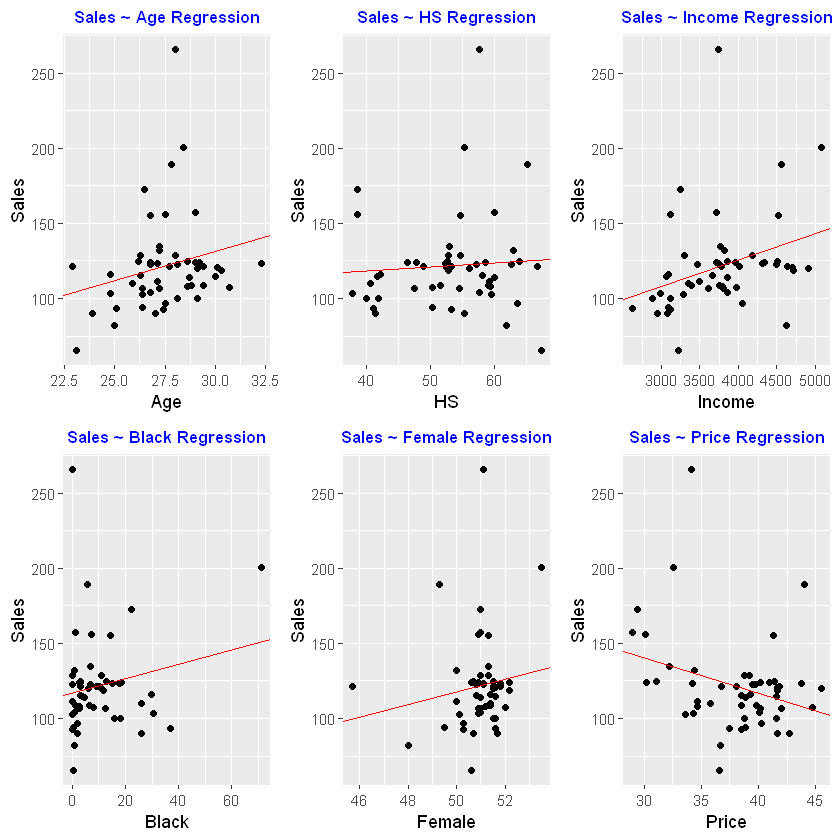

In [11]:
library(ggplot2)
library(gridExtra)

ggplotReg <- function (fit, title) {

    p <- ggplot(fit$model, aes_string(x = names(fit$model)[2], y = names(fit$model)[1])) + 
    geom_point() +
    ggtitle(title)  + # Title 이름 설정 후
    theme(plot.title = element_text(size = 10,
                                    face = "bold",
                                    color = "blue",
                                    hjust = 0.5)) + # 원하는 테마 입히기.
    geom_abline(intercept = fit$coefficients[1],
                slope = fit$coefficients[2],
                color = 'red')
}

age_reg <- lm(Sales ~ Age, p088_data)
p1 <- ggplotReg(age_reg, "Sales ~ Age Regression")

hs_reg <- lm(Sales ~ HS, p088_data)
p2 <- ggplotReg(hs_reg, "Sales ~ HS Regression")

income_reg <- lm(Sales ~ Income, p088_data)
p3 <- ggplotReg(income_reg, "Sales ~ Income Regression")

black_reg <- lm(Sales ~ Black, p088_data)
p4 <- ggplotReg(black_reg, "Sales ~ Black Regression")

female_reg <- lm(Sales ~ Female, p088_data)
p5 <- ggplotReg(female_reg, "Sales ~ Female Regression")

price_reg <- lm(Sales ~ Price, p088_data)
p6 <- ggplotReg(price_reg, "Sales ~ Price Regression")

grid.arrange(p1, p2, p3, p4, p5, p6, ncol=3, nrow=2)

In [4]:
remove_state <- subset(p088_data, select = -c(State)) # State 는 numeric 이 아니라 제외.
remove_state <- remove_state[c(7, 1, 2, 3, 4, 5, 6)] # Sales 의 산점도를 잘 비교하기 위해서, 맨 앞으로 옮겼다.
cor(remove_state)

,Sales,Age,HS,Income,Black,Female,Price
Sales,1.00000000,0.22655492,0.06669476,0.32606789,0.18959037,0.14622124,-0.30062263
Age,0.22655492,1.00000000,-0.09891626,0.25658098,-0.04033021,0.55303189,0.24775673
HS,0.06669476,-0.09891626,1.00000000,0.53400534,-0.50171191,-0.41737794,0.05697473
Income,0.32606789,0.25658098,0.53400534,1.00000000,0.01728756,-0.06882666,0.21455717
Black,0.18959037,-0.04033021,-0.50171191,0.01728756,1.00000000,0.45089974,-0.14777619
Female,0.14622124,0.55303189,-0.41737794,-0.06882666,0.45089974,1.00000000,0.02247351
Price,-0.30062263,0.24775673,0.05697473,0.21455717,-0.14777619,0.02247351,1.00000000


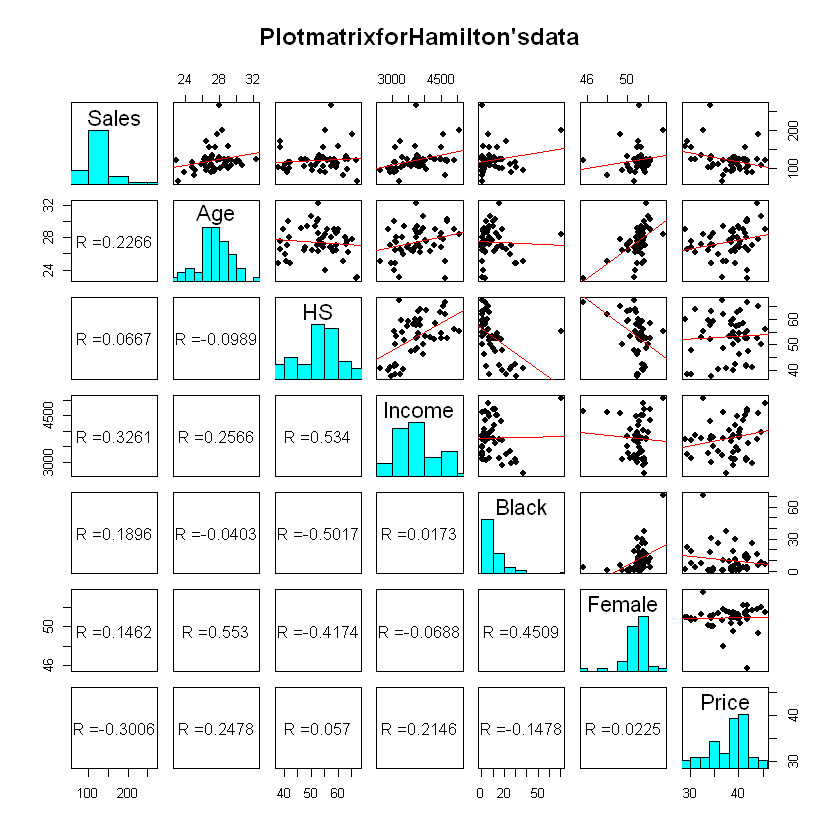

In [96]:
# chapter 4 ( 10 page )

panel.cor <- function(x,y) {
    usr <- par("usr")
    on.exit(par(usr))
    
    par(usr = c(0,1,0,1))
    r <- round(cor(x,y), digits = 10)
    txt <- paste0("R =", round(r, 4))
    text(0.5, 0.5, txt, cex = 1.3)
}

# https://stackoverflow.com/questions/36964404/histogram-on-main-diagonal-of-pairs-function-in-r
## put histograms on the diagonal
library(BioStatR) # panel.hist

# https://rfriend.tistory.com/83
panel.lm <- function(x, y) {
    points(x, y, pch=19, cex=1) 
    abline(stats::lm(y ~ x), col = "red")
}

pairs(remove_state, 
      lower.panel = panel.cor,
      upper.panel = panel.lm,
      diag.panel = panel.hist,
      main = "PlotmatrixforHamilton'sdata")

In [13]:
p088_model <- lm(Sales ~ ., remove_state)
summary(p088_model)


Call:
lm(formula = Sales ~ ., data = remove_state)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.398 -12.388  -5.367   6.270 133.213 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 103.34485  245.60719   0.421  0.67597   
Age           4.52045    3.21977   1.404  0.16735   
HS           -0.06159    0.81468  -0.076  0.94008   
Income        0.01895    0.01022   1.855  0.07036 . 
Black         0.35754    0.48722   0.734  0.46695   
Female       -1.05286    5.56101  -0.189  0.85071   
Price        -3.25492    1.03141  -3.156  0.00289 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 28.17 on 44 degrees of freedom
Multiple R-squared:  0.3208,	Adjusted R-squared:  0.2282 
F-statistic: 3.464 on 6 and 44 DF,  p-value: 0.006857
